In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
%matplotlib inline
from functools import reduce
from IPython.display import HTML

In [2]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
# Patent Count by Year
df = pd.read_csv('final.csv')
year = df['Publication Year'].value_counts()
year_dict = dict(year)


In [4]:
by_year = pd.DataFrame.from_dict(year_dict, orient="index").reset_index()
by_year.columns = ['Publication Year', 'Patent Count']
by_year.sort_values(by='Publication Year', ascending=False, inplace=True)
by_year

,Publication Year,Patent Count
2,2019,176
0,2018,209
1,2017,194
3,2016,166
4,2015,130
5,2014,104
7,2013,92
6,2012,94
8,2011,63
9,2010,50


In [5]:
import plotly.express as px
fig = px.bar(by_year, x='Publication Year', y='Patent Count')
fig.update_traces(marker_color='#FBB77E', marker_line_color='#fc6603',
                  marker_line_width=0.9, opacity=0.9)
fig.update_layout(title_text='Year Wise Patent Distribution', title_x=0.5, paper_bgcolor='#F5F6F9', plot_bgcolor='#F5F6F9')
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', gridcolor='#E1E5EC')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', gridcolor='#E1E5EC')

fig.show()

In [6]:
import plotly.graph_objects as go
Year = by_year['Publication Year'] # Year Values
Patent_Count = by_year['Patent Count'] # Patent Count Values
fig = go.Figure()
fig.add_trace(go.Scatter(x=Year,y=Patent_Count, mode='lines+markers', marker=dict(color='#fc6603', opacity=0.9)))

fig.update_layout(xaxis_title='Publication Year',
                   yaxis_title='Patent Count', title_text='Year Wise Patent Distribution', title_x=0.5, paper_bgcolor='#F5F6F9', plot_bgcolor='#F5F6F9')
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', gridcolor='#E1E5EC')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', gridcolor='#E1E5EC')
fig.show()

In [7]:
# Top 10 Central Patents

In [8]:
cen_temp = df.sort_values(by='Centrality', ascending=False).head(10).reset_index()
by_centrality = cen_temp[['Publication Number','Title','Assignee(s)', 'Centrality']]
by_centrality.index = np.arange(1, len(by_centrality)+1)
# by_centrality.style.set_properties(**{'background-color': '#3366ff',                                                   
#                                     'color': 'lawngreen',                       
#                                     'border-color': 'white'})
by_centrality.style.set_properties(**{'text-align':'left'}).set_table_styles([ dict(selector='th', props=[('text-align', 'left')]) ])

,Publication Number,Title,Assignee(s),Centrality
1,US6093809,Telomerase,Geron Corporation | University Technology Corporation,0.916263
2,US6475789,"""Human telomerase catalytic subunit: diagnostic and therapeutic methods""",Geron Corporation | University Technology Corporation,0.885329
3,US6261836,Telomerase,Geron Corporation | University Technology Corporation,0.884588
4,US9164084,"""Methods for determining aggressiveness of a cancer and treatment thereof""",Purdue Research Foundation,0.877683
5,US8790891,"""Microfluidic cell motility assay""",The General Hospital Corporation,0.839020
6,US5645986,"""Therapy and diagnosis of conditions related to telomere length and/or telomerase activity""","""The Regents of the University of California | Geron Corporation | Board of Regents",0.819955
7,US5695932,"""Telomerase activity assays for diagnosing pathogenic infections""",The Regents of the University of California | The Board of Regents of the University of Texas System,0.815238
8,US5830644,"""Method for screening for agents which increase telomerase activity in a cell""","""Geron Corporation | Board of Regents",0.814504
9,US6303289,"""Composition and methods for the treatment of cancer and viral infections""",Elenor Roosevelt Institute,0.800430
10,US5834193,"""Methods for measuring telomere length""",Geron Corporation,0.799923


In [9]:
# Top 10 Assignees
from collections import Counter
assignees = []
as_list = df['Assignee(s)'].dropna().str.split('|') # taking assignee column and separating the '|'
for items in as_list:
    assignees += items # storing all the assignees in a single list
assignees = [s.strip('"') for s in assignees]  # removing quotes from the strings
assignees = [s for s in assignees if s != ' '] # removing null values
as_temp_dict = Counter(assignees) 


In [10]:
# as_temp = df['Assignee(s)'].value_counts()
# as_temp_dict = dict(as_temp)

In [11]:
by_assignees = pd.DataFrame.from_dict(as_temp_dict, orient="index").reset_index()
by_assignees.columns = ['Assignee','Patent Count']
# nan_value = float("NaN")
# as_temp.replace("",nan_value,inplace=True)
# as_temp.dropna(subset=["Assignee"], inplace=True)
final_assignee = by_assignees.sort_values(by='Patent Count', ascending=False).head(10)
final_assignee.index = np.arange(1,len(final_assignee)+1)

In [12]:
# final_assignee.style.set_properties(**{'background-color': '#3366ff',                                                   
#                                     'color': 'lawngreen',                       
#                                     'border-color': 'white'})
final_assignee.style.set_properties(**{'text-align':'left'}).set_table_styles([ dict(selector='th', props=[('text-align', 'left')] ) ])


,Assignee,Patent Count
1,Geron Corporation,36
2,Moderna Therapeutics,34
3,Cytori Therapeutics,30
4,Alnylam Pharmaceuticals,28
5,Curemark,26
6,DePuy Synthes Products,25
7,Dana-Farber Cancer Institute,23
8,Geron Corporation,23
9,Cellular Research,21
10,ADAPTIVE BIOTECHNOLOGIES CORP.,20


In [13]:
fig = px.bar(final_assignee, x = 'Assignee', y = 'Patent Count')
# Customize aspect
fig.update_traces(marker_color='#FBB77E', marker_line_color='#fc6603',
                  marker_line_width=0.9, opacity=0.9)
fig.update_layout(title_text='Top 10 Assignees', title_x=0.5, paper_bgcolor='#F5F6F9', plot_bgcolor='#F5F6F9')
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', gridcolor='#E1E5EC')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', gridcolor='#E1E5EC')

fig.show()

In [14]:
# Top 10 inventors
from collections import Counter
inventors = []
as_list = df['Inventor(s)'].dropna().str.split('|') # taking inventor column and separating the '|'
for items in as_list:
    inventors += items # storing all the assignees in a single list
inventors = [s.strip('"') for s in inventors]  # removing quotes from the strings
inventors = [s for s in inventors if s != ' '] # removing null values
in_temp_dict = Counter(inventors) 

In [15]:
by_inventors = pd.DataFrame.from_dict(in_temp_dict, orient="index").reset_index()
by_inventors.columns = ['Inventors','Patent Count']
final_inventor = by_inventors.sort_values(by='Patent Count', ascending=False).head(10)
final_inventor.index = np.arange(1,len(final_inventor)+1)

In [16]:
final_inventor.style.set_properties(**{'text-align':'left'})

,Inventors,Patent Count
1,Joan M. Fallon,21
2,Stephen Fodor,15
3,Antonin R. de Fougerolles,15
4,Marc H. Hedrick,14
5,Robert S. Langer,13
6,Melissa K. Carpenter,13
7,Stuart L. Schreiber,12
8,David Brown,12
9,Aladar A. Szalay,11
10,Michael B. Zemel,10


In [17]:
# x = final_inventor['Inventors'] # Year Values
# y = final_inventor['Patent Count']
fig = px.bar(final_inventor, x = 'Inventors', y = 'Patent Count')
# Customize aspect
fig.update_traces(marker_color='#FBB77E', marker_line_color='#fc6603',
                  marker_line_width=0.9, opacity=0.9)
fig.update_layout(title_text='Top 10 Inventors', title_x=0.5, paper_bgcolor='#F5F6F9', plot_bgcolor='#F5F6F9')
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', gridcolor='#E1E5EC')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', gridcolor='#E1E5EC')

fig.show()

In [18]:
# Rate of Improvement (K)
def average_cent(df):
    if df.empty is False:
        cent_val = list(df['Centrality'])
        cent_vals = [float(i) for i in cent_val if (i != ' ' and str(i) != 'nan')]
        average_c = sum(cent_vals) / len(cent_vals)
        k = math.exp((average_c * 6.15987) - 5.01885) * 100
        return k
    
k = average_cent(df)    
print("The Rate of Improvement for this technology is " + str(k))

The Rate of Improvement for this technology is 2.008216508010007


In [19]:
############################# MULTIPLE FILE INPUTS #########################

In [20]:
# Multiple File Input

df1 = pd.read_csv('bacteria.csv')
df2 = pd.read_csv('coronavirus.csv')
df3 = pd.read_csv('virus.csv')
df4 = pd.read_csv('cough.csv')
df5 = pd.read_csv('polio.csv')

technology_name = ['Bacteria', 'Coronavirus', 'Virus', 'Cough', 'Polio'] # Assign Technology Name Here

In [21]:
k_comb = []

k1 = average_cent(df1)
k2 = average_cent(df2)
k3 = average_cent(df3)
k4 = average_cent(df4)
k5 = average_cent(df5)

In [22]:
k_temp = [k1,k2,k3,k4,k5]
k_comb = pd.DataFrame(k_temp) # Converting into DataFrame

In [23]:
k_comb.columns=['k']
k_comb = k_comb.sort_values(by='k', ascending=False)
k_comb.index = technology_name
fig = px.bar(k_comb, x=k_comb.index, y='k')
fig.update_layout(xaxis_title='Technologies',
                   yaxis_title='K (%)')

fig.update_traces(width = 0.4, marker_color='#FBB77E', marker_line_color='#fc6603',
                  marker_line_width=0.9, opacity=0.9)
fig.update_layout(title_text='K Comparison', title_x=0.5, paper_bgcolor='#F5F6F9', plot_bgcolor='#F5F6F9')
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', gridcolor='#E1E5EC')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', gridcolor='#E1E5EC')

fig.show()

In [24]:
A = df1.shape[0]
B = df2.shape[0]
C = df3.shape[0]
D = df4.shape[0]
E = df5.shape[0]
each_patent = [A,B,C,D,E]

note = dict(zip(technology_name,each_patent))
total_count = pd.DataFrame.from_dict(note, orient='index')
total_count.columns= ['Total Patents']


In [25]:
# Common Patents
# com_ab = list(set(df1['Publication Number']).intersection(set(df2['Publication Number'])))
# len(diff_ab)


In [26]:
# Function to find common patents between two technologies
def common_patents(df1,df2):
    return list(reduce(np.intersect1d, [df1['Publication Number'], df2['Publication Number']]))

In [27]:
# Finding common patents between two technologies at a time
com_ab = common_patents(df1,df2)
ab = len(com_ab)
com_ac = common_patents(df1,df3)
ac = len(com_ac)
com_ad = common_patents(df1,df4)
ad = len(com_ad)
com_ae = common_patents(df1,df5)

# Patents exclusive to one technology 
only_a = df1.shape[0] - len(set(com_ab + com_ac + com_ad + com_ae))
ae = len(com_ae)

com_bc = common_patents(df2,df3)
bc = len(com_bc)
com_bd = common_patents(df2,df4)
bd = len(com_bd)
com_be = common_patents(df2,df5)

only_b = df2.shape[0] - len(set(com_ab + com_bc + com_bd + com_be))
be = len(com_be)

com_cd = common_patents(df3,df4)
cd = len(com_cd)
com_ce = common_patents(df3,df5)
ce = len(com_ce)

only_c = df3.shape[0] - len(set(com_ac + com_bc + com_cd + com_ce))

com_de = common_patents(df4,df5)
de = len(com_de)

only_d = df4.shape[0] - len(set(com_ad + com_bd + com_cd + com_de))

only_e = df5.shape[0] - len(set(com_ae + com_be + com_ce + com_de))

In [28]:
# Setting up a dictionary as per the table requirement
final_combined = {'a' : [only_a, ab, ac, ad, ae], 'b': [ab, only_b, bc, bd, be], 'c': [ac, bc, only_c, cd, ce], 'd':[ad, bd, cd, only_d, de], 'e':[ae, be, ce, de, only_e]}

In [29]:
pd.options.display.max_columns = None
multi_comb = pd.DataFrame(final_combined)
multi_comb.columns = technology_name #Assigning Technology Name
multi_comb.index = technology_name


<AxesSubplot:>

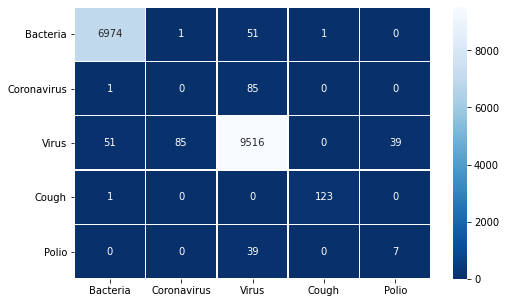

In [30]:
# Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(multi_comb, annot=True,fmt='d', cmap = 'Blues_r', linewidths=0.5)

In [31]:
def hover(hover_color="#ffff99"):
    return dict(selector="tr:hover",
                props=[("background-color", "%s" % hover_color)])

styles = [
    hover(),
    dict(selector="th", props=[("font-size", "150%"),
                               ("text-align", "right")]),
    dict(selector="caption", props=[("caption-side", "bottom")])
]
comb_data_show = (multi_comb.style.set_table_styles(styles).set_properties(**{'width': '120px','text-align': 'right'}))
total_counts = (total_count.style.set_table_styles(styles))

In [32]:
total_counts

,Total Patents
Bacteria,7026
Coronavirus,85
Virus,9690
Cough,124
Polio,46


In [33]:
comb_data_show

,Bacteria,Coronavirus,Virus,Cough,Polio
Bacteria,6974,1,51,1,0
Coronavirus,1,0,85,0,0
Virus,51,85,9516,0,39
Cough,1,0,0,123,0
Polio,0,0,39,0,7
